# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
#declare and intialize few empty arrays needed to store data
temp =[]
humidity = []
cloudiness = []
wind_speed = []
max_temp = []
min_temp =[]
date = []
lat = []
long = []
country = []
city = []

#weather api url 
open_weather_url = "http://api.openweathermap.org/data/2.5/weather?"  
#city query url
city_query_url = f"{open_weather_url}q="
app_key_url = f"&appid={weather_api_key}"

# run a for loop for all the cities by passing them to the query parameter
for i in range(len(cities)):
    try:
        # get all thedata needed into data structures or arrays
        response = requests.get(city_query_url + cities[i] + app_key_url)
        response_json = response.json()
        city.append(response_json['name'])
        temp.append(response_json['main']['temp'])
        max_temp.append(response_json['main']['temp_max'])
        min_temp.append(response_json['main']['temp_min'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        date.append(response_json['dt'])
        lat.append(response_json['coord']['lat'])
        long.append(response_json['coord']['lon'])
        country.append(response_json['sys']['country'])
        
        #log each city
        print(f'City {i}: {cities[i]}')
    
    #if city not found --> handle error scenario
    except KeyError:
         print('No City Found!')
            

City 0: ponta do sol
No City Found!
City 2: bredasdorp
City 3: conde
City 4: port elizabeth
City 5: bengkulu
No City Found!
City 7: cabedelo
City 8: natal
City 9: wanning
No City Found!
City 11: tura
No City Found!
City 13: rikitea
City 14: puerto ayora
City 15: mandalgovi
City 16: lata
City 17: sindou
City 18: yerbogachen
City 19: chakwal
City 20: luderitz
City 21: senanga
City 22: souillac
City 23: khatanga
City 24: mataura
City 25: busselton
City 26: tautira
City 27: san rafael
City 28: priladozhskiy
City 29: pacific grove
City 30: sisimiut
City 31: salinas
City 32: ancud
City 33: new norfolk
City 34: skibbereen
City 35: shubarkuduk
City 36: atuona
City 37: clyde river
City 38: lebu
City 39: hobart
City 40: shenjiamen
City 41: erzin
City 42: pisco
City 43: flin flon
No City Found!
City 45: punta arenas
City 46: tateyama
City 47: cairns
City 48: la macarena
No City Found!
City 50: napier
No City Found!
City 52: kapaa
City 53: bethel
City 54: gorgan
City 55: sitka
City 56: kailua
City

City 439: tolaga bay
City 440: zelenoborskiy
City 441: jega
City 442: bandarbeyla
City 443: newnan
City 444: mbandaka
City 445: neyshabur
City 446: klyuchi
City 447: ichinohe
City 448: tyler
City 449: igrim
City 450: villacarrillo
City 451: sola
City 452: bella vista
City 453: bagaces
City 454: kearney
City 455: zharkovskiy
City 456: dhangadhi
City 457: kara-tyube
City 458: trincomalee
City 459: epe
City 460: vao
City 461: nuevo progreso
City 462: sosnovo-ozerskoye
City 463: honiara
City 464: mulege
City 465: artyom
City 466: nizhniy kuranakh
City 467: buraydah
City 468: innisfail
City 469: grindavik
City 470: quang ngai
City 471: yaan
No City Found!
City 473: mecca
No City Found!
City 475: boa vista
City 476: sakakah
City 477: canutama
No City Found!
City 479: springbok
City 480: sur
City 481: buluang
City 482: rabaul
City 483: sayat
City 484: moerai
City 485: marzuq
City 486: mehamn
City 487: rocha
City 488: olafsvik
City 489: palamos
City 490: pingliang
City 491: vila velha
City 492

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
cities_df = pd.DataFrame({"City":city,"Lat":lat,"Long":long,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date})
#display the dataframe
display(cities_df.head())
#export the prev city data into a csv
cities_df.to_csv('../output_data/cities.csv',index=False, header=True)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta do Sol,32.6667,-17.1000,287.59,65,7,0.89,PT,1620269283
1,Bredasdorp,-34.5322,20.0403,288.15,92,100,2.24,ZA,1620269284
2,Conde,-7.2597,-34.9075,297.15,94,40,2.06,BR,1620269284
3,Port Elizabeth,-33.9180,25.5701,290.15,94,20,5.66,ZA,1620269284
4,Bengkulu,-3.8004,102.2655,299.47,84,100,1.08,ID,1620269666


In [50]:
#use describe on the cities dataframe to get the stats 
cities_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02
mean,18.157445,20.818596,289.559239,72.220779,57.779221,3.116494,1.620269e+09
std,34.001439,91.821913,10.047952,21.084126,38.762280,2.181364,8.543895e+01
min,-54.800000,-175.200000,262.950000,6.000000,0.000000,0.190000,1.620269e+09
25%,-9.089450,-63.297650,281.655000,63.000000,20.000000,1.540000,1.620269e+09
50%,20.502200,25.950000,291.480000,77.000000,75.000000,2.570000,1.620269e+09
75%,46.551100,105.488300,297.550000,88.000000,97.000000,4.220000,1.620269e+09
max,78.218600,179.316700,307.630000,100.000000,100.000000,15.750000,1.620270e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [65]:
#if there are cities > 100% humidity
#remove them else skip this step

cities_df_outliers = cities_df[cities_df['Humidity'] >100]
if len(cities_df_outliers) != 0:
    cities_df.drop(cities_df.index[['Humidity'] >100], inplace = True)
len(cities_df_outliers)   

0

In [67]:
#  Get the indices of cities that have humidity over 100%.
humidity_outliers_index = cities_df_outliers.index
len(humidity_outliers_index)

0

In [122]:
clean_city_data = cities_df.drop(humidity_outliers_index, inplace = False)
clean_city_data.drop_duplicates(inplace=True)
clean_city_data.head()            

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta do Sol,32.6667,-17.1000,287.59,65,7,0.89,PT,1620269283
1,Bredasdorp,-34.5322,20.0403,288.15,92,100,2.24,ZA,1620269284
2,Conde,-7.2597,-34.9075,297.15,94,40,2.06,BR,1620269284
3,Port Elizabeth,-33.9180,25.5701,290.15,94,20,5.66,ZA,1620269284
4,Bengkulu,-3.8004,102.2655,299.47,84,100,1.08,ID,1620269666


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

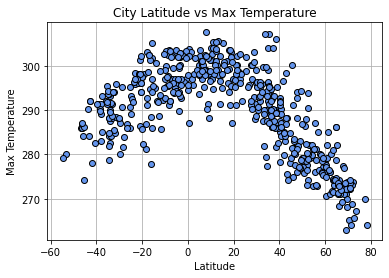

In [123]:
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
#as there is no change in the cities_df due to humidity using pre-calculated individual arrays
plt.plot(lat, max_temp,marker="o",markerfacecolor="cornflowerblue",color='black',linestyle='None')
#save the plot as image
#lesson learnt: When you close the image displayed by plt.show(), the image is closed and freed from memory.You should call savefig and savetxt before calling show.
plt.savefig('../Images/CityLatitude_vs_MaxTemperature.png')
plt.show()


## Latitude vs. Humidity Plot

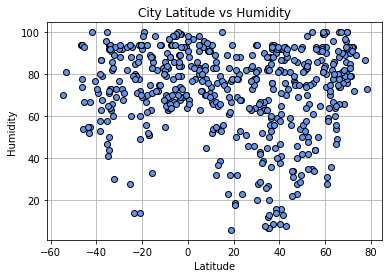

In [124]:
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
#as there is no change in the cities_df due to humidity using pre-calculated individual arrays
plt.plot(lat,humidity,marker="o",markerfacecolor="cornflowerblue",color='black',linestyle='None')
plt.savefig('../Images/CityLatitude_vs_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

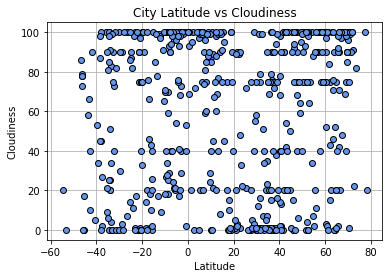

In [125]:
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
#as there is no change in the cities_df due to humidity using pre-calculated individual arrays
plt.plot(lat, cloudiness,marker="o",markerfacecolor="cornflowerblue",color='black',linestyle='None')
#save the plot as image
#lesson learnt: When you close the image displayed by plt.show(), the image is closed and freed from memory.You should call savefig and savetxt before calling show.
plt.savefig('../Images/CityLatitude_vs_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

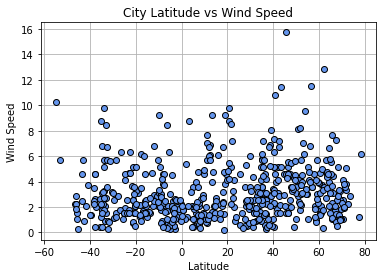

In [126]:
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
#as there is no change in the cities_df due to humidity using pre-calculated individual arrays
plt.plot(lat, wind_speed,marker="o",markerfacecolor="cornflowerblue",color='black',linestyle='None')
#save the plot as image
#lesson learnt: When you close the image displayed by plt.show(), the image is closed and freed from memory.You should call savefig and savetxt before calling show.
plt.savefig('../Images/CityLatitude_vs_WindSpeed.png')
plt.show()

## Linear Regression

In [127]:
#Equator or latitude 0 divides northern and southern hemisphere
#Get nothern hemisphere data
north_hemisphere_df = clean_city_data[clean_city_data['Lat'] > 0]
#Get southern hemisphere data
south_hemisphere_df = clean_city_data[clean_city_data['Lat'] < 0]
display(north_hemisphere_df)
display(south_hemisphere_df)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta do Sol,32.6667,-17.1000,287.59,65,7,0.89,PT,1620269283
7,Wanning,18.8003,110.3967,303.19,67,100,3.79,CN,1620269285
8,Tura,25.5198,90.2201,301.98,51,72,0.58,IN,1620269104
11,Mandalgovi,45.7625,106.2708,274.95,31,15,15.75,MN,1620269668
12,Lata,40.1629,-8.3327,287.59,92,98,1.01,PT,1620269668
...,...,...,...,...,...,...,...,...,...
528,Tiparak,8.0341,123.5288,307.63,45,60,0.35,PH,1620269431
529,Senneterre,48.3835,-77.2328,277.15,75,75,3.60,CA,1620269432
530,Harar,9.3094,42.1258,288.15,91,90,2.74,ET,1620269432
533,St. George's,12.0564,-61.7485,299.15,83,20,6.69,GD,1620269433


,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bredasdorp,-34.5322,20.0403,288.15,92,100,2.24,ZA,1620269284
2,Conde,-7.2597,-34.9075,297.15,94,40,2.06,BR,1620269284
3,Port Elizabeth,-33.9180,25.5701,290.15,94,20,5.66,ZA,1620269284
4,Bengkulu,-3.8004,102.2655,299.47,84,100,1.08,ID,1620269666
5,Cabedelo,-6.9811,-34.8339,297.15,94,40,2.06,BR,1620269667
...,...,...,...,...,...,...,...,...,...
532,Singaparna,-7.3515,108.1110,302.09,64,94,1.61,ID,1620269432
534,Port Hedland,-20.3167,118.5667,302.15,70,40,0.51,AU,1620269433
535,Christchurch,-43.5333,172.6333,290.37,55,58,4.63,NZ,1620269289
536,El Alto,-4.2714,-81.2147,293.83,79,98,4.53,PE,1620269433


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8777236141589126


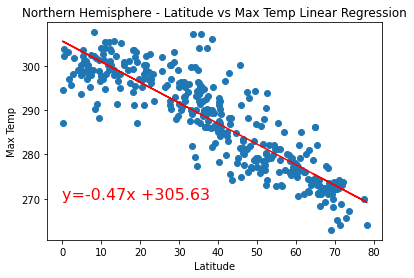

In [131]:
x_values = north_hemisphere_df['Lat']
y_values = north_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(0,270),fontsize=16,color='red')

plt.ylabel('Max Temp')
plt.xlabel('Latitude')

plt.title('Northern Hemisphere - Latitude vs Max Temp Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_North_MaxTemp_vs_Latitude.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6668607816553985


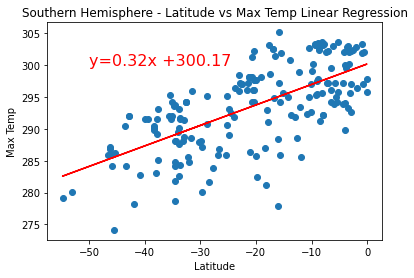

In [133]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(-50,300),fontsize=16,color='red')

plt.ylabel('Max Temp')
plt.xlabel('Latitude')

plt.title('Southern Hemisphere - Latitude vs Max Temp Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_South_MaxTemp_vs_Latitude.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07996847737316269


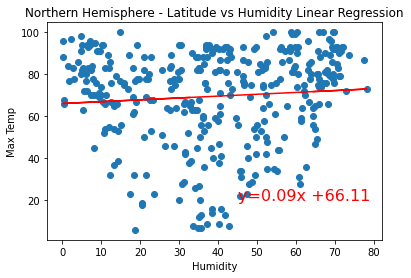

In [136]:
x_values = north_hemisphere_df['Lat']
y_values = north_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(45,20),fontsize=16,color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.title('Northern Hemisphere - Latitude vs Humidity Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_North_Lat_vs_Humidity.png')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14799872700563105


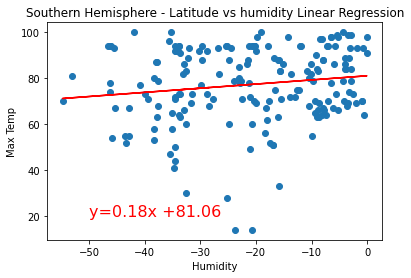

In [137]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(-50,20),fontsize=16,color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.title('Southern Hemisphere - Latitude vs humidity Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_South_Humidity_vs_Latitude.png')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11501492499707797


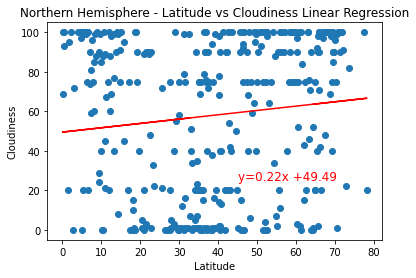

In [140]:
x_values = north_hemisphere_df['Lat']
y_values = north_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(45,25),fontsize=12,color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.title('Northern Hemisphere - Latitude vs Cloudiness Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_North_Lat_vs_Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1924168079565583


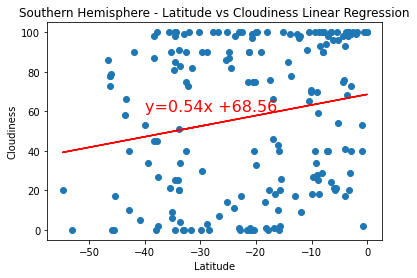

In [147]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(-40,60),fontsize=16,color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.title('Southern Hemisphere - Latitude vs Cloudiness Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_South_Cloudiness_vs_Latitude.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08202587139724825


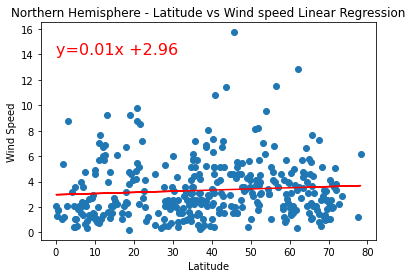

In [153]:
x_values = north_hemisphere_df['Lat']
y_values = north_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(0,14),fontsize=16,color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.title('Northern Hemisphere - Latitude vs Wind speed Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_North_Lat_vs_WindSpeed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.17425111426161186


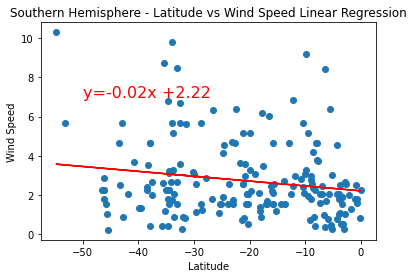

In [150]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(-50,7),fontsize=16,color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.title('Southern Hemisphere - Latitude vs Wind Speed Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_South_WindSpeed_vs_Latitude.png')
plt.show()